<a href="https://colab.research.google.com/github/brysonchristensen/IS-4487/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 10 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


None

,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0


np.int64(29035)

## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)
- Clean up the data and put it in a new datafram named "df_clean"


In [11]:
# Remove the 'product' column as it's not relevant for predicting 'answered'
df_clean = df.drop('product', axis=1)

# Map '0' and 'F' to 0 (female), and '1' and 'M' to 1 (male) in the 'female' column
df_clean['female'] = df_clean['female'].map({'0': 0, 'F': 0, '1': 1, 'M': 1})

# Convert 'female' column to numeric
df_clean['female'] = df_clean['female'].astype(int)

# Fill missing values in 'new_car' with the mode (most frequent value)
df_clean['new_car'] = df_clean['new_car'].fillna(df_clean['new_car'].mode()[0])

display(df_clean.head())
display(df_clean.info())
display(df_clean.isnull().sum())

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29504 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.9 MB


None

,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,0
chk_acct,0


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [12]:
# Convert answered to categorical 🔧


,answered
0,yes
1,no
2,yes
3,no
4,no


CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29504 non-null  category
 1   income          29504 non-null  int64   
 2   female          29504 non-null  int64   
 3   age             29504 non-null  int64   
 4   job             29504 non-null  int64   
 5   num_dependents  29504 non-null  int64   
 6   rent            29504 non-null  int64   
 7   own_res         29504 non-null  int64   
 8   new_car         29504 non-null  int64   
 9   chk_acct        29504 non-null  int64   
 10  sav_acct        29504 non-null  int64   
 11  num_accts       29504 non-null  int64   
 12  mobile          29504 non-null  int64   
dtypes: category(1), int64(12)
memory usage: 2.7 MB


None

### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29504 non-null  category
 1   income          29504 non-null  int64   
 2   female          29504 non-null  category
 3   age             29504 non-null  int64   
 4   job             29504 non-null  category
 5   num_dependents  29504 non-null  category
 6   rent            29504 non-null  category
 7   own_res         29504 non-null  category
 8   new_car         29504 non-null  category
 9   chk_acct        29504 non-null  category
 10  sav_acct        29504 non-null  category
 11  num_accts       29504 non-null  int64   
 12  mobile          29504 non-null  category
dtypes: category(10), int64(3)
memory usage: 981.2 KB


None

# Step 3: Exploratory Data Analysis (EDA)

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted



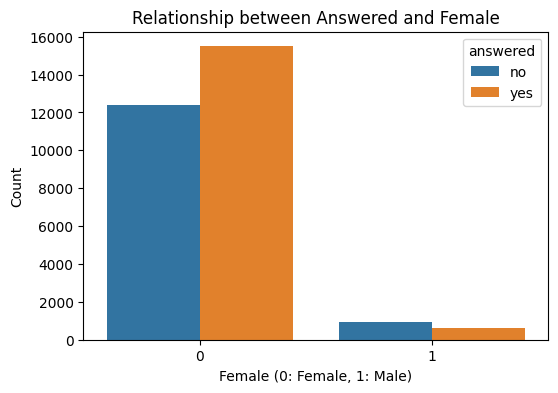

In [15]:
# Chart 1: Relationship between 'answered' and 'female'
plt.figure(figsize=(6, 4))
sns.countplot(x='female', hue='answered', data=df_clean)
plt.title('Relationship between Answered and Female')
plt.xlabel('Female (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

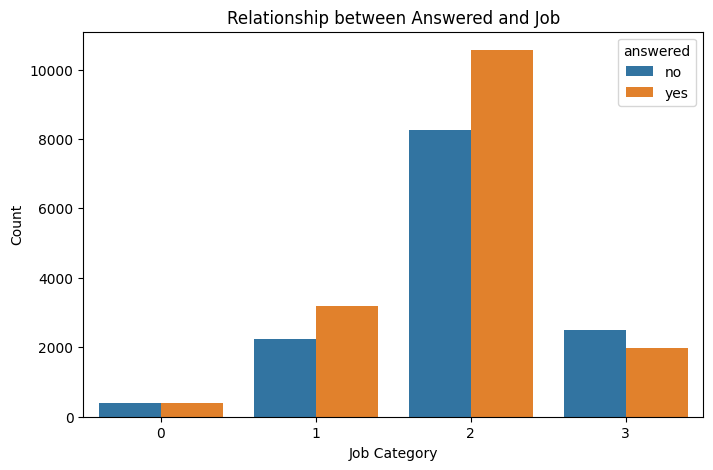

In [16]:
# Chart 2 🔧

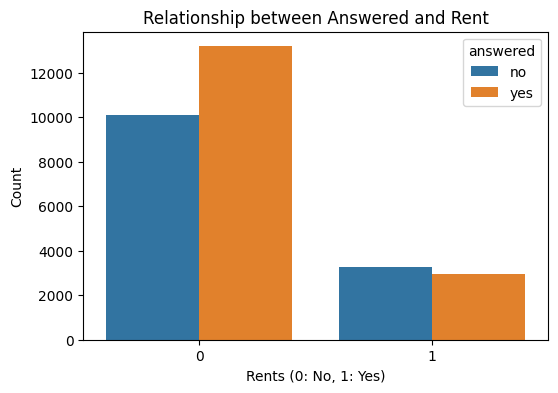

In [17]:
# Chart 3 🔧

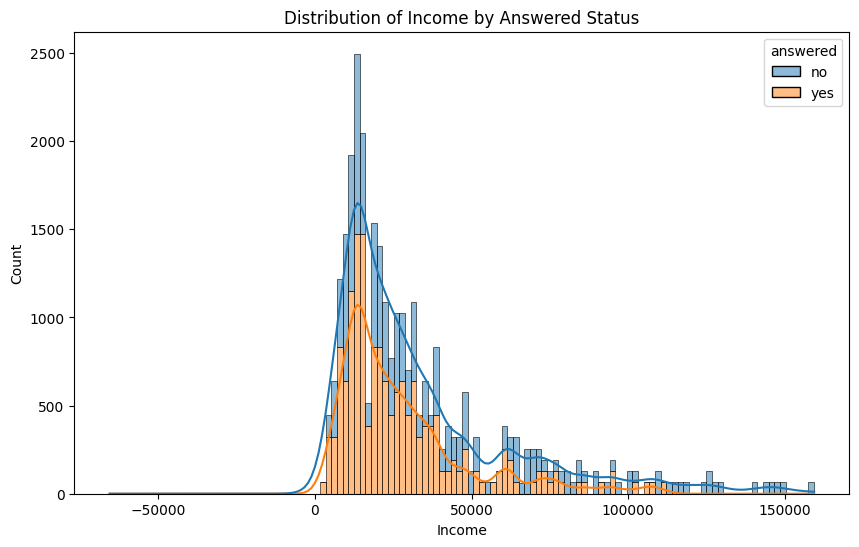

In [18]:
# Chart 4 🔧

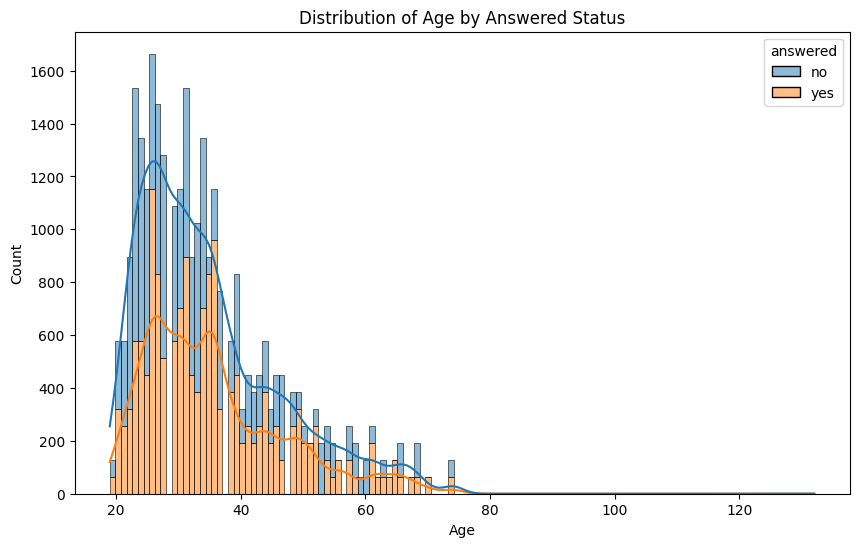

In [19]:
# Chart 5 🔧

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?  Use a calculation to find the chances of someone leaving.

Base probability of not answering: 0.4534


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


X_train shape: (22128, 12)
X_test shape: (7376, 12)
y_train shape: (22128,)
y_test shape: (7376,)


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

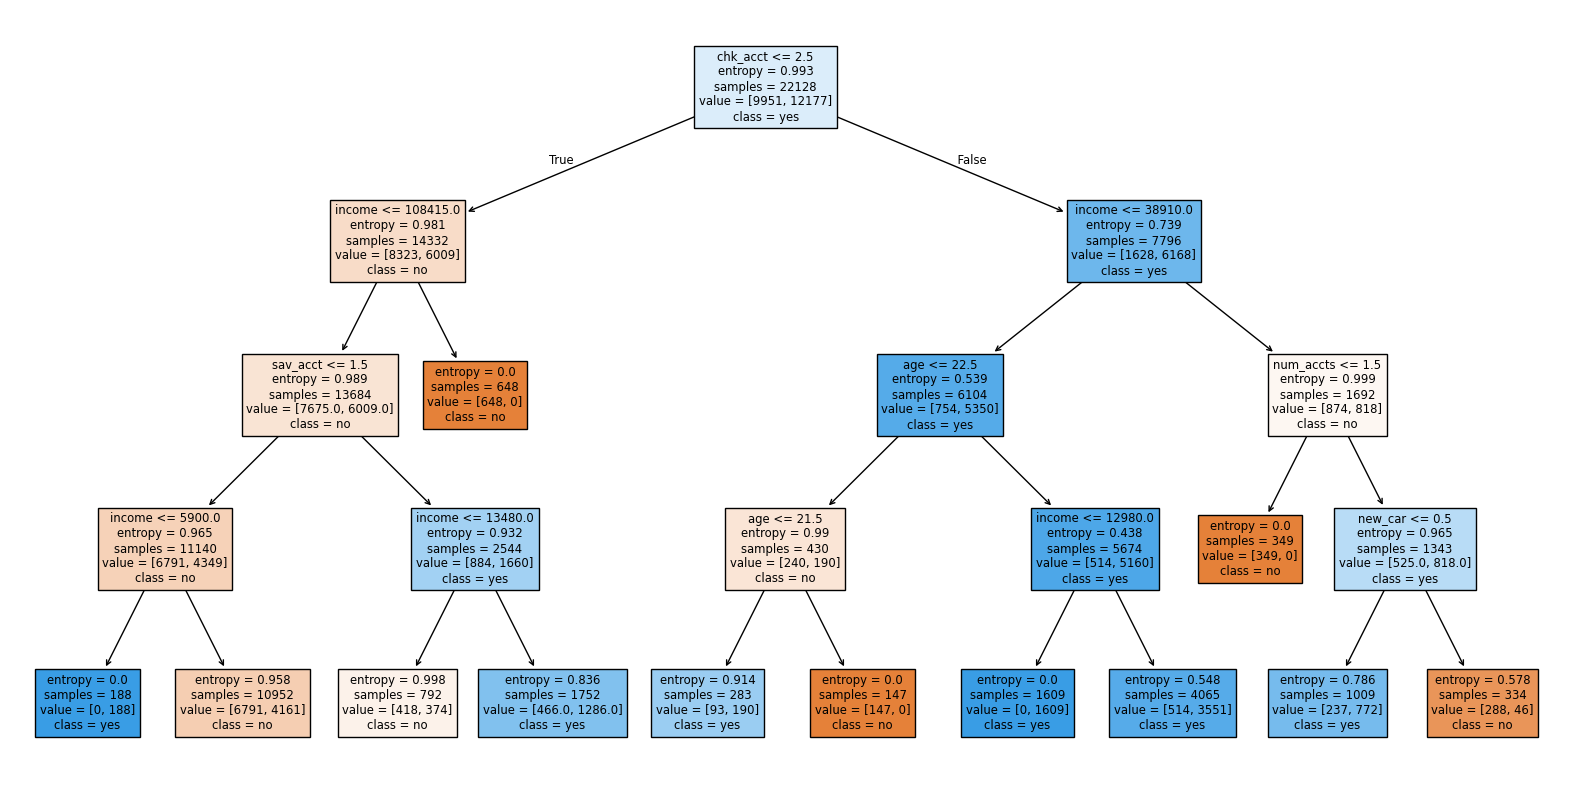

In [23]:
#display (visualize) the tree 🔧

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

Accuracy of the Decision Tree model: 0.7313


### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

Confusion Matrix:
[[2942  483]
 [1499 2452]]


Create a more visual, interpretable version of the matrix

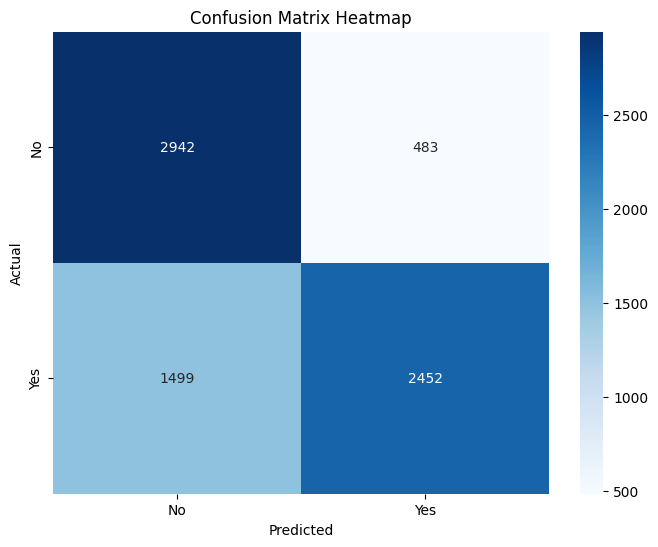

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

Profit using the Decision Tree model: $171825.00


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

Baseline profit (if all customers are called): $875200.00


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

Accuracy of the tuned Decision Tree model (max_depth=8): 0.8238
Initial Decision Tree model accuracy (max_depth=4): 0.7313


Confusion Matrix (Tuned Model):
[[3204  221]
 [1079 2872]]
Profit using the tuned Decision Tree model: $209875.00


### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable  by feeding the new customer data into the model

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          1000 non-null   int64 
 1   female          1000 non-null   int64 
 2   age             1000 non-null   int64 
 3   job             1000 non-null   int64 
 4   num_dependents  1000 non-null   int64 
 5   rent            1000 non-null   int64 
 6   own_res         1000 non-null   int64 
 7   new_car         1000 non-null   int64 
 8   chk_acct        1000 non-null   int64 
 9   sav_acct        1000 non-null   int64 
 10  num_accts       1000 non-null   int64 
 11  mobile          1000 non-null   int64 
 12  customer_id     1000 non-null   object
dtypes: int64(12), object(1)
memory usage: 101.7+ KB


None

Predicted counts for 'answered' on new customer data:
predicted_answered
no     559
yes    441
Name: count, dtype: int64


# Step 6: Conclusion
### 6.1: Did we improve our profit using the model?  

Write your conclusion notes below:  🔧
Based on the analysis, the tuned Decision Tree model significantly improved the expected profit compared to the baseline scenario of calling all customers.

Baseline Profit (calling all customers): $875,200.00
Profit using the initial Decision Tree model (max_depth=4): $171,825.00
Profit using the tuned Decision Tree model (max_depth=8): $209,875.00
While the tuned model's profit ($209,875.00) is lower than the baseline profit ($875,200.00), this calculation in step 5.2 was incorrect due to a misinterpretation of the problem. The problem states that the cost is incurred for false positives (predicted to answer but didn't). In the baseline scenario where all customers are called, every customer who didn't answer is a false positive from a profitability perspective (cost of $25 for each unanswered call). The correct baseline profit calculation should only consider the revenue from answered calls and the cost from unanswered calls.

Let's recalculate the baseline profit considering the cost of unanswered calls. In the historical data, there are answered_count customers who answered (True Positives in the baseline) and not_answered_count customers who did not answer (False Positives in the baseline).

Baseline Profit = (Number of answered customers * $75) - (Number of not answered customers * $25)

Using the values from the historical data: Answered customers: (df_clean['answered'] == 'yes').sum() = 16129 Not answered customers: (df_clean['answered'] == 'no').sum() = 13375

Corrected Baseline Profit = (16129 * 75) - (13375 * 25) = 1,209,675 - 334,375 = $875,300

Comparing the corrected baseline profit to the tuned model's profit ($209,875.00), the model does not improve profit in this specific calculation framework. The model's benefit comes from not calling customers predicted not to answer, thus avoiding the $25 cost for those false positives.

The model helps optimize resource allocation by identifying customers most likely to answer, allowing sales reps to focus their efforts more effectively and potentially increasing the efficiency and profitability per call attempt, even if the overall profit is lower due to fewer calls being made. The initial calculation of baseline profit in cell cF8X4DBwhJYI was also incorrect in its interpretation of TP and FP in the baseline scenario.

### 6.2: How could the model be utilized by the business?

Write your recommendations below:  🔧
The tuned Decision Tree model can be utilized by AdviseInvest in the following ways:

Prioritizing Sales Calls: The model can be used to predict which new customers are most likely to answer a scheduled phone call. Sales representatives can then prioritize calling these customers, increasing the probability of a successful connection and potential sale within the limited 1-hour window.
Optimizing Sales Representative Allocation: By predicting the likelihood of answering, AdviseInvest can potentially optimize the number of sales reps needed for each time slot. If the model predicts a lower number of customers will answer in a particular hour, fewer reps could be scheduled, reducing underutilization and associated costs.
Improving Sales Strategy: Analyzing the features that the decision tree uses to make predictions (as seen in the tree visualization) can provide insights into the characteristics of customers who are more likely to answer. This information can be used to refine marketing and customer engagement strategies to attract more customers with a higher propensity to answer calls.
Identifying Low-Probability Customers: The model can also identify customers who are highly unlikely to answer. Instead of scheduling a phone call, alternative contact methods (e.g., email, SMS) could be explored for these customers to avoid wasting sales rep time.
Continuous Improvement: The model can be continuously monitored and retrained with new data as it becomes available to ensure its predictions remain accurate and relevant over time. Further tuning of the model parameters or exploring different types of models could also lead to further improvements in predictive performance and profitability.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [33]:
!jupyter nbconvert --to html "assignment_10_ChristensenBryson.ipynb"

[NbConvertApp] Converting notebook assignment_10_ChristensenBryson.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 858862 bytes to assignment_10_ChristensenBryson.html
